
<div style="text-align: center; font-size: 20px;margin-top:20px;">
  <strong>Deep Learning Task 1</strong>
</div>

In [1]:

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aseemdandgaval/23-pet-breeds-image-classification")

print("Path to dataset files:", path)
Path = path + "/Pet_Breeds"

100%|██████████| 794M/794M [00:20<00:00, 40.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aseemdandgaval/23-pet-breeds-image-classification/versions/2


In [3]:
transformations = transforms.Compose([transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)])

3881
['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']


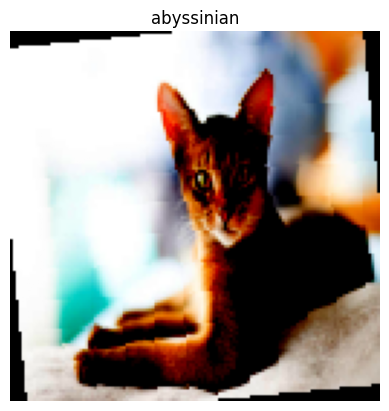

In [4]:
full_data = datasets.ImageFolder(root = Path, transform=transformations)
print(len(full_data))
print(full_data.classes)
img,label = full_data[0]
label
plt.imshow(img.permute(1, 2, 0))
plt.title(full_data.classes[label])
plt.axis('off')
plt.show()
all_classes = full_data.classes


In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)
print(len(train_data), len(test_data))


3104 777


In [6]:
from torch.utils.data import Dataset
print(type(train_data))
print(type(full_data))
#print(train_data[0])
class ConvertToDataset(Dataset):
    def __init__(self, data):
        self.data = data
        self.classes = []

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        return self.data[i]

train_data = ConvertToDataset(train_data)
test_data = ConvertToDataset(test_data)
print(type(train_data))
train_data.classes = full_data.classes
test_data.classes = full_data.classes
print(test_data.classes)
print(train_data.classes)
print(full_data.classes)
# test_data.classes = full_data.classes
# print(train_dataset.classes)



<class 'list'>
<class 'torchvision.datasets.folder.ImageFolder'>
<class '__main__.ConvertToDataset'>
['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']
['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']
['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siame

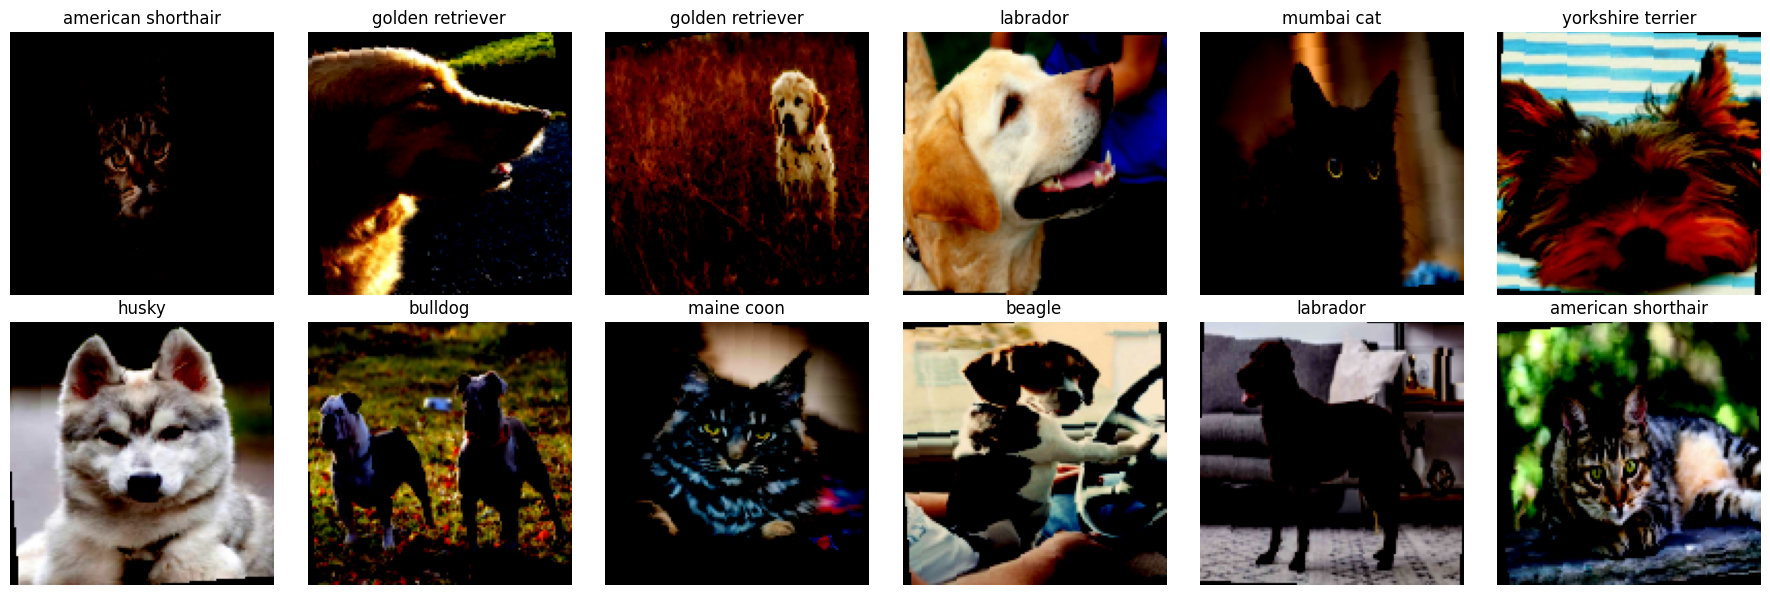

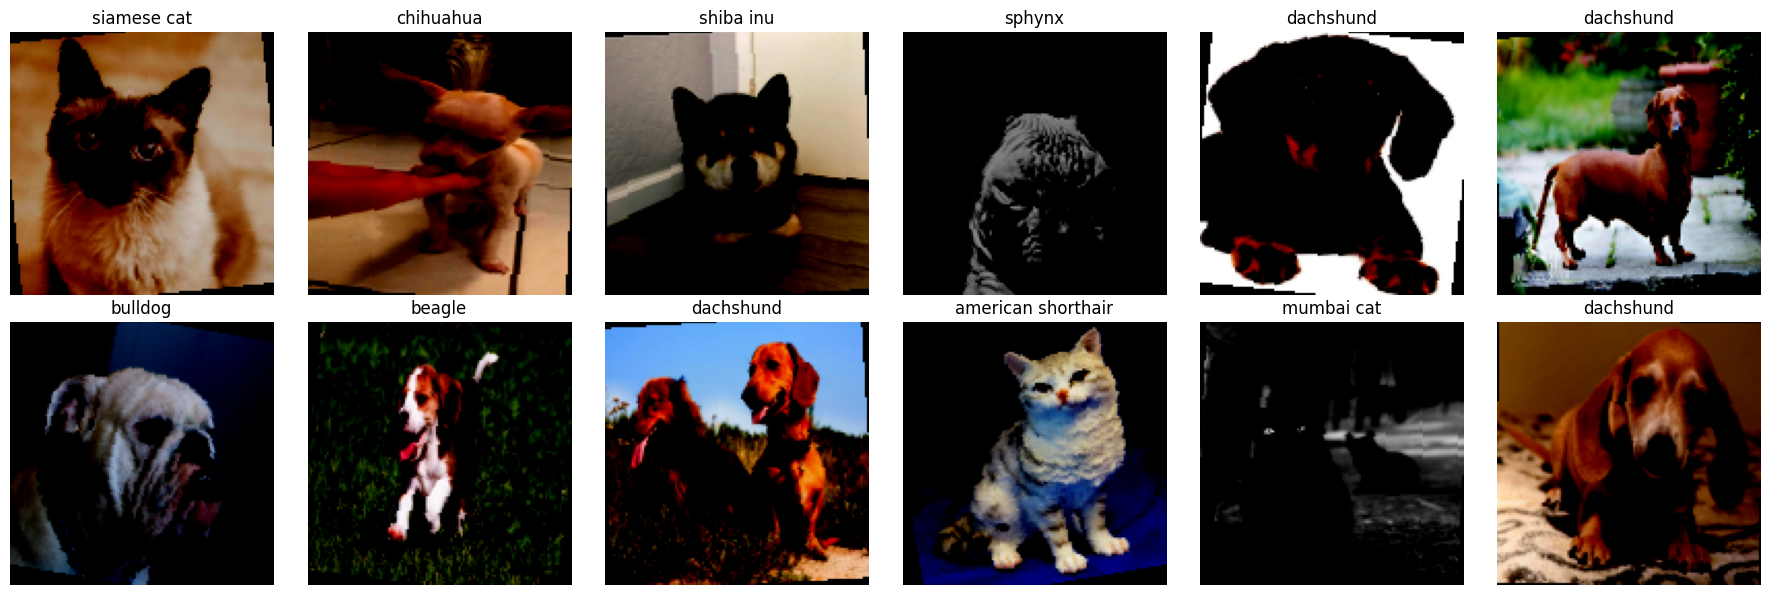

In [7]:

fig, axes = plt.subplots(2, 6, figsize=(18, 6))
axes = axes.flatten()
for i in range(12):
    img, label = train_data[i]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(train_data.classes[label])
    axes[i].axis('off')
#     plt.imshow(img.permute(1, 2, 0))
#     plt.title(train_data.classes[label])
#     plt.axis('off')
#     plt.show()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 6, figsize=(18, 6))
axes = axes.flatten()
for i in range(12):
    img, label = test_data[i]
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(test_data.classes[label])
    axes[i].axis('off')
plt.tight_layout()
plt.show()








In [8]:
print(len(train_data))
print(len(test_data))

3104
777


In [9]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data,batch_size=32, shuffle=True,num_workers=0)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)

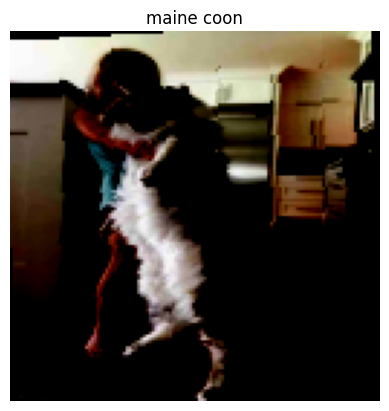

torch.Size([32, 3, 128, 128])
torch.Size([32])


In [10]:
for images, labels in train_loader:
    plt.imshow(images[0].permute(1, 2, 0))
    plt.title(train_data.classes[labels[0]])
    plt.axis('off')
    plt.show()
    print(images.shape)
    print(labels.shape)
    break

In [ ]:
class MyImageClassifier(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shapes):
        super().__init__()
        self.sequence = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(2),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32768, output_shapes)




        )
    def forward(self, x):

            return self.sequence(x)


In [ ]:
torch.manual_seed(42)
my_model = MyImageClassifier(input_shape=3, hidden_units=128, output_shapes=23).to(device)


In [13]:
!pip install torchinfo
from torchinfo import summary
summary(my_model, input_size=[1, 3,128 , 128],device =device)

Layer (type:depth-idx)                   Output Shape              Param #
MyImageClassifier                        [1, 23]                   --
├─Sequential: 1-1                        [1, 23]                   --
│    └─Conv2d: 2-1                       [1, 128, 128, 128]        3,584
│    └─ReLU: 2-2                         [1, 128, 128, 128]        --
│    └─Dropout: 2-3                      [1, 128, 128, 128]        --
│    └─MaxPool2d: 2-4                    [1, 128, 64, 64]          --
│    └─Conv2d: 2-5                       [1, 128, 64, 64]          147,584
│    └─ReLU: 2-6                         [1, 128, 64, 64]          --
│    └─MaxPool2d: 2-7                    [1, 128, 32, 32]          --
│    └─Conv2d: 2-8                       [1, 128, 32, 32]          147,584
│    └─ReLU: 2-9                         [1, 128, 32, 32]          --
│    └─Dropout: 2-10                     [1, 128, 32, 32]          --
│    └─MaxPool2d: 2-11                   [1, 128, 16, 16]          --
│ 

In [14]:
import psutil

def print_memory_usage():
    mem = psutil.virtual_memory()
    print(f"RAM used: {mem.used / 1024**3:.2f} GB / {mem.total / 1024**3:.2f} GB")


def train_loop(model, data_loader, loss_fn, optimizer, device):

    print_memory_usage()
    model.train()
    train_loss = 0
    train_accuracy = 0
    for X, y in data_loader:

        X = X.to(device)
        y = y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_accuracy += (y_pred_class == y).sum().item()/len(y_pred_class)
    average_train_loss = train_loss / len(data_loader)
    average_train_accuracy = train_accuracy / len(data_loader)
    return average_train_loss, average_train_accuracy

In [ ]:
def test_loop(model, data_loader, loss_fn, device):
    model.eval()
    test_loss = 0
    test_accuracy = 0
    with torch.inference_mode():
        for X, y in data_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            test_pred_labels = y_pred.argmax(dim=1)
            test_accuracy += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    average_test_loss = test_loss / len(data_loader)
    average_test_accuracy = test_accuracy / len(data_loader)

    return average_test_loss, average_test_accuracy

In [16]:
loss_fn = nn.CrossEntropyLoss()
epochs = 10
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.001,weight_decay=1e-5)
def train_the_model(epochs,loss_fn,optimizer,model,train_loader,test_loader,device):
    train_accuracies = []
    train_losses = []
    test_accuracies = []
    test_losses = []
    for epoch in range(epochs):
        train_loss, train_accuracy = train_loop(model,train_loader, loss_fn, optimizer,device)
        test_loss, test_accuracy = test_loop(model,test_loader, loss_fn, device)
        print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.4f} | "
                f"train_acc: {train_accuracy:.4f} | "
                f"test_loss: {test_loss:.4f} | "
                f"test_acc: {test_accuracy:.4f}"
            )
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)
    return train_losses,train_accuracies,test_losses,test_accuracies
train_losses,train_accuracies,test_losses,test_accuracies = train_the_model(epochs,loss_fn,optimizer,my_model,train_loader,test_loader,device)


RAM used: 2.37 GB / 12.67 GB
Epoch: 1 | train_loss: 3.1506 | train_acc: 0.0548 | test_loss: 3.0825 | test_acc: 0.0750
RAM used: 2.47 GB / 12.67 GB
Epoch: 2 | train_loss: 2.9801 | train_acc: 0.1111 | test_loss: 3.0102 | test_acc: 0.1487
RAM used: 2.60 GB / 12.67 GB
Epoch: 3 | train_loss: 2.7896 | train_acc: 0.1707 | test_loss: 2.9049 | test_acc: 0.1558
RAM used: 2.69 GB / 12.67 GB
Epoch: 4 | train_loss: 2.6221 | train_acc: 0.2262 | test_loss: 2.8812 | test_acc: 0.1790
RAM used: 2.69 GB / 12.67 GB
Epoch: 5 | train_loss: 2.3888 | train_acc: 0.2945 | test_loss: 2.8215 | test_acc: 0.1915
RAM used: 2.69 GB / 12.67 GB
Epoch: 6 | train_loss: 2.0609 | train_acc: 0.3831 | test_loss: 2.7997 | test_acc: 0.1785
RAM used: 2.69 GB / 12.67 GB
Epoch: 7 | train_loss: 1.6395 | train_acc: 0.5126 | test_loss: 2.7978 | test_acc: 0.1953
RAM used: 2.69 GB / 12.67 GB
Epoch: 8 | train_loss: 1.1387 | train_acc: 0.6566 | test_loss: 2.8779 | test_acc: 0.1883
RAM used: 2.70 GB / 12.67 GB
Epoch: 9 | train_loss: 0.71

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
range(0, 10)


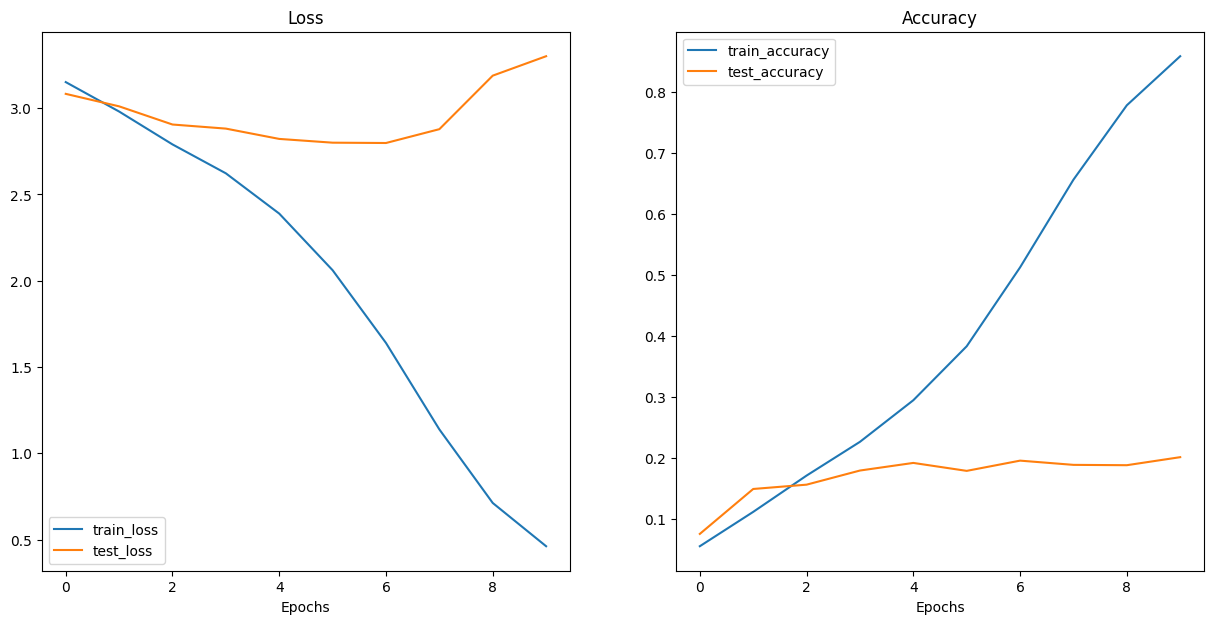

In [17]:
def model_plots(epochs,train_losses,train_accuracies,test_losses,test_accuracies):
    temp = epochs
    epochs = [i for i in range (temp)]
    print(epochs)
    print(range(temp))

    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label='train_loss')
    plt.plot(epochs, test_losses, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='train_accuracy')
    plt.plot(epochs, test_accuracies, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
    epochs = temp
model_plots(epochs,train_losses,train_accuracies,test_losses,test_accuracies)

In [18]:
import gc
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
efficient_net_model = torchvision.models.efficientnet_b0(weights = weights).to(device)
loss_fn = nn.CrossEntropyLoss()
epochs = 10
def complete_analysis_of_model(model,weights,Path,epochs,device,loss_fn):

    for param in model.parameters():
        param.requires_grad = False
    torch.manual_seed(42)
    torch.cuda.manual_seed(42)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features=1280, out_features=23, bias=True)
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    model = model.to(device)
    model.classifier
    transformations = weights.transforms()
    full_data = datasets.ImageFolder(root = Path, transform=transformations)
    train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)
    train_data = ConvertToDataset(train_data)
    test_data = ConvertToDataset(test_data)
    train_data.classes = full_data.classes
    test_data.classes = full_data.classes
    train_loader = DataLoader(train_data,batch_size=32, shuffle=True,num_workers=0)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    torch.manual_seed(42)
    torch.cuda.manual_seed(42)
    #start_time = timer()

    train_losses,train_accuracies,test_losses,test_accuracies = train_the_model(epochs,loss_fn,optimizer,model,train_loader,test_loader,device)
    model_plots(epochs,train_losses,train_accuracies,test_losses,test_accuracies)
    del train_loader
    del test_loader
    gc.collect()
    torch.cuda.empty_cache()
    return model


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 141MB/s]


RAM used: 4.77 GB / 12.67 GB
Epoch: 1 | train_loss: 1.8777 | train_acc: 0.6089 | test_loss: 1.0350 | test_acc: 0.8249
RAM used: 4.84 GB / 12.67 GB
Epoch: 2 | train_loss: 0.9104 | train_acc: 0.8193 | test_loss: 0.6908 | test_acc: 0.8588
RAM used: 4.87 GB / 12.67 GB
Epoch: 3 | train_loss: 0.6979 | train_acc: 0.8431 | test_loss: 0.5670 | test_acc: 0.8700
RAM used: 4.89 GB / 12.67 GB
Epoch: 4 | train_loss: 0.5823 | train_acc: 0.8595 | test_loss: 0.5209 | test_acc: 0.8700
RAM used: 4.89 GB / 12.67 GB
Epoch: 5 | train_loss: 0.4969 | train_acc: 0.8847 | test_loss: 0.4651 | test_acc: 0.8762
RAM used: 4.89 GB / 12.67 GB
Epoch: 6 | train_loss: 0.4575 | train_acc: 0.8889 | test_loss: 0.4543 | test_acc: 0.8888
RAM used: 4.89 GB / 12.67 GB
Epoch: 7 | train_loss: 0.4213 | train_acc: 0.8992 | test_loss: 0.4456 | test_acc: 0.8862
RAM used: 4.90 GB / 12.67 GB
Epoch: 8 | train_loss: 0.3744 | train_acc: 0.9159 | test_loss: 0.4354 | test_acc: 0.8900
RAM used: 4.90 GB / 12.67 GB
Epoch: 9 | train_loss: 0.34

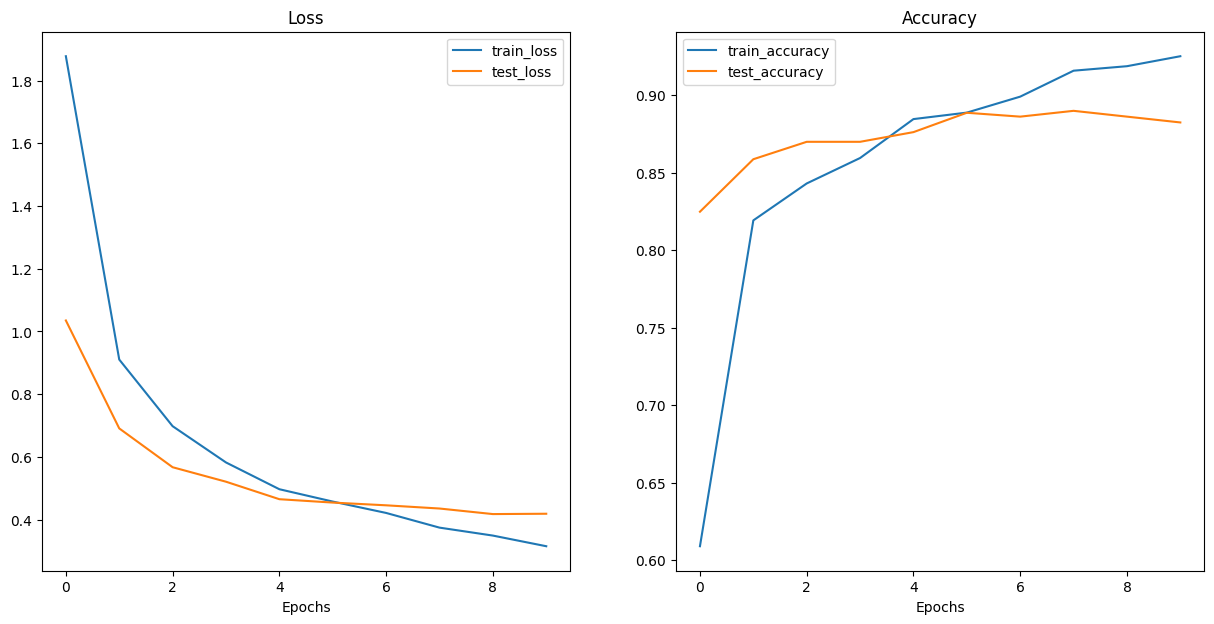

In [19]:
efficient_net_model = complete_analysis_of_model(efficient_net_model,weights,Path,epochs,device,loss_fn)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 90.4MB/s]


RAM used: 7.05 GB / 12.67 GB
Epoch: 1 | train_loss: 1.9278 | train_acc: 0.5805 | test_loss: 1.0610 | test_acc: 0.8225
RAM used: 7.07 GB / 12.67 GB
Epoch: 2 | train_loss: 0.9360 | train_acc: 0.8222 | test_loss: 0.6937 | test_acc: 0.8375
RAM used: 7.15 GB / 12.67 GB
Epoch: 3 | train_loss: 0.7047 | train_acc: 0.8441 | test_loss: 0.5584 | test_acc: 0.8638
RAM used: 7.13 GB / 12.67 GB
Epoch: 4 | train_loss: 0.5814 | train_acc: 0.8718 | test_loss: 0.5263 | test_acc: 0.8562
RAM used: 7.18 GB / 12.67 GB
Epoch: 5 | train_loss: 0.4963 | train_acc: 0.8840 | test_loss: 0.4553 | test_acc: 0.8762
RAM used: 7.16 GB / 12.67 GB
Epoch: 6 | train_loss: 0.4500 | train_acc: 0.8959 | test_loss: 0.4418 | test_acc: 0.8788
RAM used: 7.14 GB / 12.67 GB
Epoch: 7 | train_loss: 0.4172 | train_acc: 0.9034 | test_loss: 0.4364 | test_acc: 0.8800
RAM used: 7.16 GB / 12.67 GB
Epoch: 8 | train_loss: 0.3710 | train_acc: 0.9101 | test_loss: 0.4233 | test_acc: 0.8812
RAM used: 7.13 GB / 12.67 GB
Epoch: 9 | train_loss: 0.35

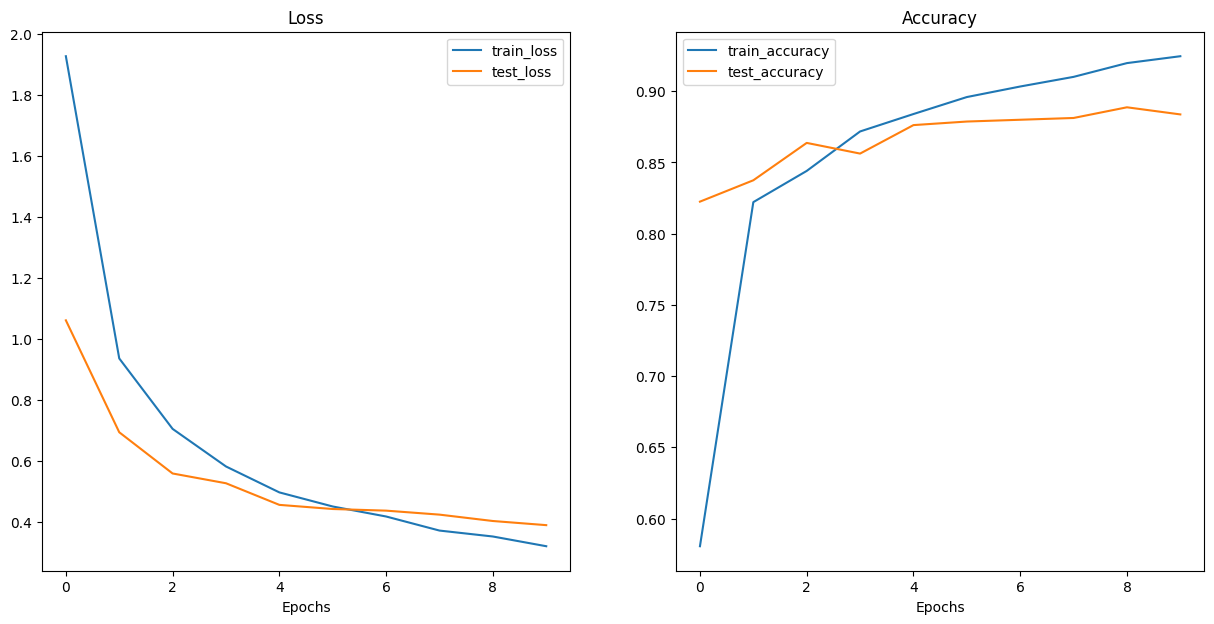

In [20]:
weights = torchvision.models.MobileNet_V2_Weights.DEFAULT
mobilenet_model = torchvision.models.mobilenet_v2(weights=weights).to(device)
mobilenet_model = complete_analysis_of_model(mobilenet_model,weights,Path,epochs,device,loss_fn)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


RAM used: 7.25 GB / 12.67 GB
Epoch: 1 | train_loss: 1.6998 | train_acc: 0.5960 | test_loss: 0.7736 | test_acc: 0.8337
RAM used: 7.27 GB / 12.67 GB
Epoch: 2 | train_loss: 0.7057 | train_acc: 0.8434 | test_loss: 0.5189 | test_acc: 0.8675
RAM used: 7.29 GB / 12.67 GB
Epoch: 3 | train_loss: 0.5302 | train_acc: 0.8692 | test_loss: 0.4367 | test_acc: 0.8725
RAM used: 7.29 GB / 12.67 GB
Epoch: 4 | train_loss: 0.4501 | train_acc: 0.8853 | test_loss: 0.4003 | test_acc: 0.8888
RAM used: 7.29 GB / 12.67 GB
Epoch: 5 | train_loss: 0.3842 | train_acc: 0.9059 | test_loss: 0.3555 | test_acc: 0.9025
RAM used: 7.29 GB / 12.67 GB
Epoch: 6 | train_loss: 0.3556 | train_acc: 0.9114 | test_loss: 0.3647 | test_acc: 0.8975
RAM used: 7.26 GB / 12.67 GB
Epoch: 7 | train_loss: 0.3337 | train_acc: 0.9146 | test_loss: 0.3638 | test_acc: 0.8868
RAM used: 7.27 GB / 12.67 GB
Epoch: 8 | train_loss: 0.3023 | train_acc: 0.9182 | test_loss: 0.3387 | test_acc: 0.8968
RAM used: 7.27 GB / 12.67 GB
Epoch: 9 | train_loss: 0.28

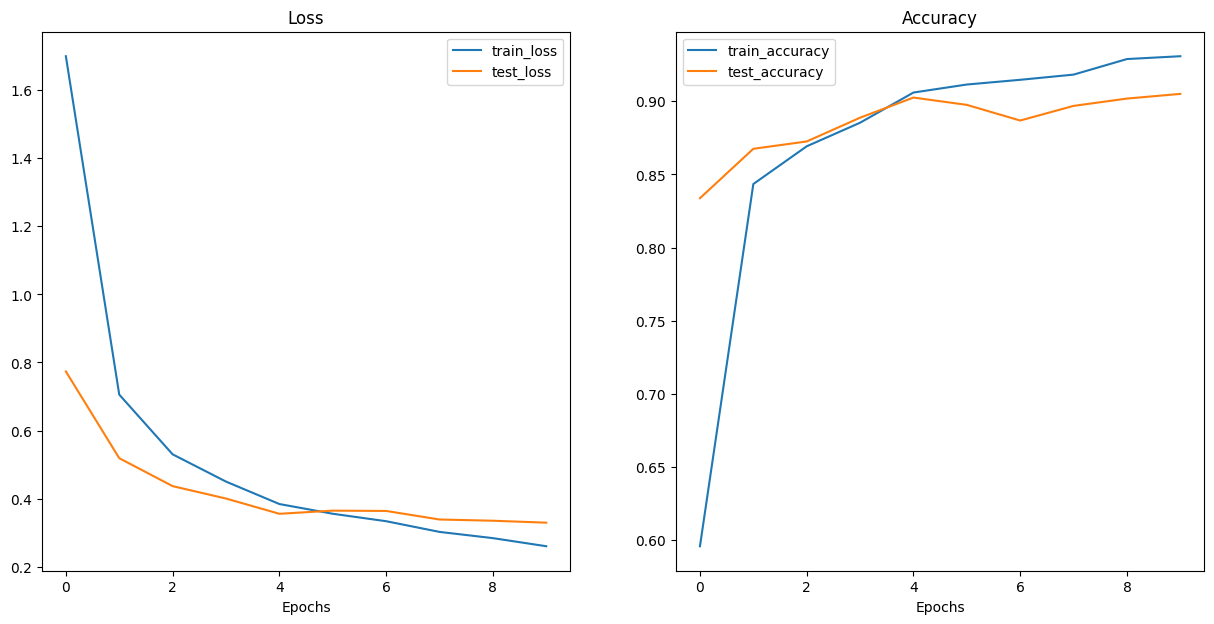

In [21]:
weights = torchvision.models.ResNet18_Weights.DEFAULT
resnet_model = torchvision.models.resnet18(weights=weights).to(device)
for param in resnet_model.parameters():
    param.requires_grad = False
torch.manual_seed(42)
torch.cuda.manual_seed(42)
in_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(in_features=in_features, out_features=23, bias=True)

optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001, weight_decay=1e-5)
model = resnet_model.to(device)
transformations = weights.transforms()
full_data = datasets.ImageFolder(root = Path, transform=transformations)
train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)
train_data = ConvertToDataset(train_data)
test_data = ConvertToDataset(test_data)
train_data.classes = full_data.classes
test_data.classes = full_data.classes
train_loader = DataLoader(train_data,batch_size=32, shuffle=True,num_workers=0)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#start_time = timer()

train_losses,train_accuracies,test_losses,test_accuracies = train_the_model(epochs,loss_fn,optimizer,model,train_loader,test_loader,device)
model_plots(epochs,train_losses,train_accuracies,test_losses,test_accuracies)
del model
del train_loader
del test_loader
gc.collect()
torch.cuda.empty_cache()



In [25]:
from PIL import Image
from timeit import default_timer as timer

my_transformations = transforms.Compose([transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)])
efficient_transformations = torchvision.models.EfficientNet_B0_Weights.DEFAULT.transforms()
mobile_transformations = torchvision.models.MobileNet_V2_Weights.DEFAULT.transforms()
res_transformations = torchvision.models.ResNet18_Weights.DEFAULT.transforms()

my_model.to(device)
efficient_net_model.to(device)
mobilenet_model.to(device)
resnet_model.to(device)

def pred_on_new(model,transformations,image_path,i,index_to_model):
  plt.subplot(1,4,i)
  img = Image.open(image_path)
  model.eval()
  with torch.inference_mode():
    transformed_image = transformations(img).unsqueeze(dim=0)
    transformed_image = transformed_image.to(device)
    start = timer()
    pred = model(transformed_image)
    probabilities = torch.softmax(pred,dim = 1)
    final_pred = torch.argmax(probabilities,dim = 1)
    end = timer()
    total_time = (end - start)*1000
    total_time = round(total_time,2)
    plt.imshow(img)
    plt.title(f"{index_to_model[i]}\nPred: {all_classes[final_pred]} | Prob: {probabilities.max():.3f}\nTime taken: {total_time} ms")
    plt.tight_layout()
    plt.axis(False);




In [23]:
from google.colab import files

uploaded = files.upload()


Saving test_image.jpg to test_image.jpg


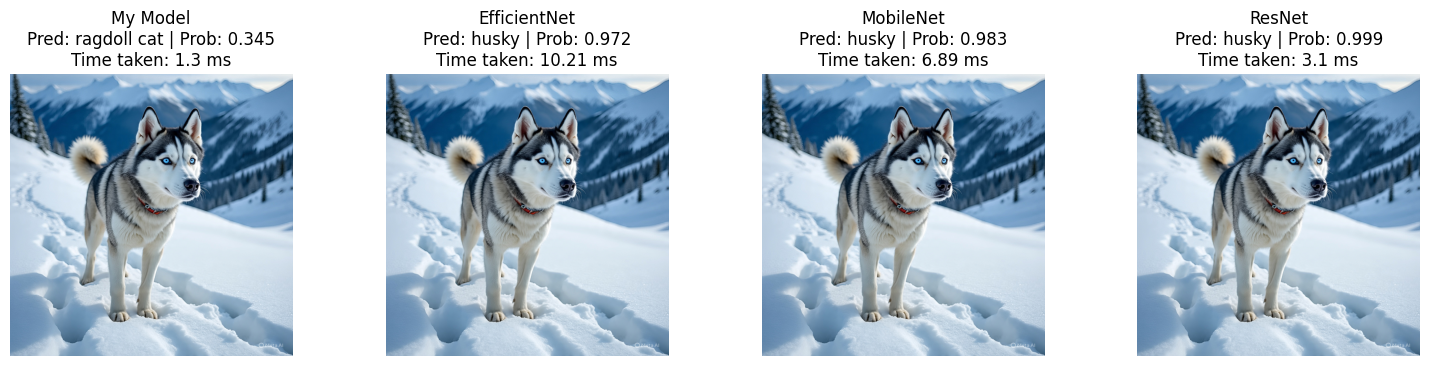

In [26]:
import os
filename = list(uploaded.keys())[0]

image_path = os.path.abspath(filename)
index_to_model = {1:"My Model",2:"EfficientNet",3:"MobileNet",4:"ResNet"}
plt.figure(figsize=(16, 4))
pred_on_new(my_model,my_transformations,image_path,1,index_to_model)
pred_on_new(efficient_net_model,efficient_transformations,image_path,2,index_to_model)
pred_on_new(mobilenet_model,mobile_transformations,image_path,3,index_to_model)
pred_on_new(resnet_model,res_transformations,image_path,4,index_to_model)